# Deep Learning with Python

## 5.2 Training a convnet from scratch on a small dataset


Quando estamos engajados na vis√£o computacional, o problema com o qual frequentemente temos que lidar √© treinar um modelo de classifica√ß√£o de imagem em um pequeno conjunto de dados. Entendendo que o "pequeno" aqui pode ser de centenas a dezenas de milhares.

Desta se√ß√£o para as pr√≥ximas se√ß√µes, o que temos que fazer √© treinar um pequeno modelo do zero, usar a rede pr√©-treinada para extra√ß√£o de recursos e ajustar a rede pr√©-treinada. Juntas, essas etapas podem ser usadas para resolver pequenos dados. 

O que faremos nesta se√ß√£o √© treinar uma pequena modelo do zero para classificar fotos de c√£es e gatos. 

Baixar dados

Usaremos o conjunto de dados C√£es vs. Gatos para treinar o modelo. Este conjunto de dados cont√©m muitas fotos de gatos e cachorros. Este conjunto de dados n√£o √© integrado ao Keras, podemos baix√°-lo do Kaggle: https://www.kaggle.com/c/dogs-vs-cats/data

Baixe e descompacte.
Em seguida, vamos criar o conjunto de dados que queremos usar: 1000 amostras para cada gato e cachorro no conjunto de treinamento, 500 cada no conjunto de valida√ß√£o e 500 cada no conjunto de teste. Programa para realizar este trabalho:

Antes de mais nada os notebooks aqui mostrado tiveram como base/foram retirados dos seguintes reposit√≥rios: 
 > https://github.com/fchollet/deep-learning-with-python-notebooks 
 
 
 > https://github.com/cdfmlr/Deep-Learning-with-Python-Notebooks
 
 Sugiro fortemente que consultem os c√≥digos originais e em caso de d√∫vida podem me contatar para conversarmos. 

In [1]:
# Copie a imagem para o diret√≥rio de treinamento, valida√ß√£o e teste
import os, shutil

original_dataset_dir = '.../dogs-vs-cats/dogs-vs-cats/train'    # Inserir aqui a localiza√ß√£o do Conjunto de dados original

base_dir = '..../dogs-vs-cats/cats_and_dogs_small'    # A localiza√ß√£o do conjunto de dados menor que ser√° salvo
os.mkdir(base_dir)


# Crie v√°rios diret√≥rios e coloque os conjuntos de treinamento, valida√ß√£o e teste divididos
train_dir = os.path.join(base_dir, 'train') #criando o diret√≥rio de treinamento
os.mkdir(train_dir)
validation_dir = os.path.join(base_dir, 'validation')#criando o diret√≥rio de valida√ß√£o
os.mkdir(validation_dir)
test_dir = os.path.join(base_dir, 'test')#criando o diret√≥rio de teste
os.mkdir(test_dir)

# Criando pastas para separar imagens de gatos e cachorros em cada diret√≥rio anteriormente criado 

#primeiro criando pasta gatos e cachorros dentro de treinamento
train_cats_dir = os.path.join(train_dir, 'cats')
os.mkdir(train_cats_dir)
train_dogs_dir = os.path.join(train_dir, 'dogs')
os.mkdir(train_dogs_dir)
#depois criando pasta gatos e cachorros dentro de valida√ß√£o
validation_cats_dir = os.path.join(validation_dir, 'cats')
os.mkdir(validation_cats_dir)
validation_dogs_dir = os.path.join(validation_dir, 'dogs')
os.mkdir(validation_dogs_dir)
#por √∫ltimo criando pasta gatos e cachorros dentro de teste
test_cats_dir = os.path.join(test_dir, 'cats')
os.mkdir(test_cats_dir)
test_dogs_dir = os.path.join(test_dir, 'dogs')
os.mkdir(test_dogs_dir)

# Agora vamos copiar as primeiras 1000 imagens de gatos para a pasta de gatos dentro de treino
fnames = [f'cat.{i}.jpg' for i in range(1000)]    # Aqui, f-String √© usado e Python> = 3.6 √© necess√°rio. Vers√µes antigas podem usar'cat. {}. Jpg'.format (i)
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_cats_dir, fname)
    shutil.copyfile(src, dst)
# vamos copiar as 500 entre 1000 e 1500 imagens de gatos para a pasta de gatos para dentro de valida√ß√£o    
fnames = [f'cat.{i}.jpg' for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_cats_dir, fname)
    shutil.copyfile(src, dst)
# vamos copiar as 500 entre 1500 e 2000 imagens de gatos para a pasta de gatos para dentro de teste   
fnames = [f'cat.{i}.jpg' for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_cats_dir, fname)
    shutil.copyfile(src, dst)
    
# Fazendo a mesmiss√≠ma coisa s√≥ que com as imagens de cachorros:
fnames = [f'dog.{i}.jpg' for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_dogs_dir, fname)
    shutil.copyfile(src, dst)
    
fnames = [f'dog.{i}.jpg' for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_dogs_dir, fname)
    shutil.copyfile(src, dst)
    
fnames = [f'dog.{i}.jpg' for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_dogs_dir, fname)
    shutil.copyfile(src, dst)
    
# Vamos printar rapidinho a quantidade de imagens dentro de cada diret√≥rio
print('total training cat images:', len(os.listdir(train_cats_dir))) #total de imagens de gatos para treinamento
print('total validation cat images:', len(os.listdir(validation_cats_dir))) #total de imagens de gatos para valida√ß√£o
print('total test cat images:', len(os.listdir(test_cats_dir))) #total de imagens de gatos para teste

print('total training dog images:', len(os.listdir(train_dogs_dir))) #total de imagens de cachorros para treinamento
print('total validation dog images:', len(os.listdir(validation_dogs_dir))) #total de imagens de cachorros para valida√ß√£o
print('total test dog images:', len(os.listdir(test_dogs_dir))) #total de imagens de cachorros para teste

total training cat images: 1000
total validation cat images: 500
total test cat images: 500
total training dog images: 1000
total validation dog images: 500
total test dog images: 500


### Construa a rede

Em quase todas as redes neurais convolucionais, aumentamos gradualmente a profundidade do mapa de recursos e diminu√≠mos gradualmente o tamanho. Ent√£o, desta vez, fizemos o mesmo.

Nosso problema atual √© de duas categorias, ent√£o a √∫ltima camada usa um Denso ativado por sigm√≥ide de 1 unidade:

In [39]:
# Instancie uma pequena rede neural convolucional para classifica√ß√£o de c√£es e gatos

from tensorflow.keras import layers
from tensorflow.keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

D√™ uma olhada na estrutura da rede:

In [40]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 15, 15, 128)      

Ent√£o temos que compilar essa rede para classifica√ß√£o bin√°ria, ent√£o a fun√ß√£o de perda usa crossentropy bin√°ria (crossentropy bin√°ria), e o otimizador ainda usa RMSprop (sempre escrevemos `optimizer = 'rmsprop'` antes, desta vez precisamos passar o ponto Par√¢metros, ent√£o use a inst√¢ncia `optimizers.RMSprop`):

In [41]:
from tensorflow.keras import optimizers

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

### Pr√©-processamento de dados

Temos que transformar essas imagens em tensores de ponto flutuante para aliment√°-los para a rede neural. Proceda da seguinte forma:

1. Leia os arquivos de imagem
2. Decodifique o conte√∫do do arquivo JPEG em uma grade de pixels RGB
3. Convertido em tensor de ponto flutuante
4. Dimensione o valor do pixel de `[0, 255]` para `[0, 1]`

Keras fornece algumas ferramentas para automatizar isso:

In [42]:
# Use ImageDataGenerator para ler imagens do cat√°logo

from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary')    # Use r√≥tulos bin√°rios

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


O train_generator e o validation_generator produzidos aqui s√£o geradores Python e c√°lculos pregui√ßosos. Este gerador produz um lote de cada vez, ent√£o o chamamos de "gerador de lote" e iteramos um para ver:

In [43]:
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    print('labels_batch:', labels_batch)
    break

data batch shape: (20, 150, 150, 3)
labels batch shape: (20,)
labels_batch: [1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 0. 1. 1. 0. 1.]


In [44]:
# Ajuste o modelo com o gerador de lote
history = model.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=30,
    validation_data=validation_generator,
    validation_steps=50)

Epoch 1/30
100/100 [==============================] - 97s 967ms/step - loss: 0.6901 - acc: 0.5450 - val_loss: 0.6785 - val_acc: 0.5270
Epoch 2/30
100/100 [==============================] - 86s 865ms/step - loss: 0.6661 - acc: 0.5875 - val_loss: 0.6525 - val_acc: 0.6060
Epoch 3/30
100/100 [==============================] - 109s 1s/step - loss: 0.6344 - acc: 0.6405 - val_loss: 0.6360 - val_acc: 0.6450
Epoch 4/30
100/100 [==============================] - 122s 1s/step - loss: 0.5856 - acc: 0.6905 - val_loss: 0.6407 - val_acc: 0.6170
Epoch 5/30
100/100 [==============================] - 113s 1s/step - loss: 0.5503 - acc: 0.7160 - val_loss: 0.6254 - val_acc: 0.6530
Epoch 6/30
100/100 [==============================] - 86s 858ms/step - loss: 0.5258 - acc: 0.7495 - val_loss: 0.6445 - val_acc: 0.6410
Epoch 7/30
100/100 [==============================] - 117s 1s/step - loss: 0.4907 - acc: 0.7550 - val_loss: 0.5918 - val_acc: 0.6910
Epoch 8/30
100/100 [==============================] - 132s 1s/s

Aqui, como o lote √© lido do gerador para ajustar, o ajuste que normalmente usamos √© alterado para fit_generator. Ele cont√©m o gerador de dados de treinamento, o n√∫mero de vezes que uma rodada deve render do train_generator (steps_per_epoch), a rodada, o gerador do conjunto de valida√ß√£o e o n√∫mero de vezes que uma rodada deve render do validation_generator (validation_steps).

`` `
steps_per_epoch = n√∫mero total de dados do conjunto de treinamento / batch_size especificado ao construir o gerador
`` `

validation_steps √© semelhante a steps_per_epoch, exceto para o conjunto de valida√ß√£o.

Salve o modelo treinado com a seguinte linha de c√≥digo:

In [45]:
# Salvando o modelo
model.save('...dogs-vs-cats/cats_and_dogs_small_1.h5') #localiza√ß√£o da pasta e nome do modelo 

Em seguida, fa√ßa um desenho do processo de treinamento para ver:

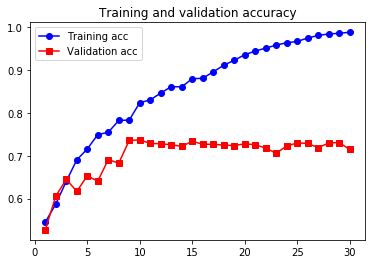

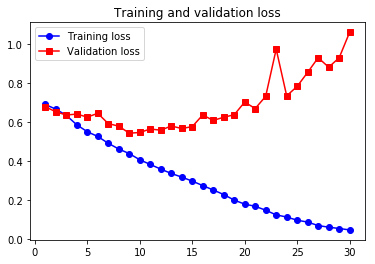

In [46]:
# Trace a curva de perda e a curva de precis√£o durante o treinamento
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo-', label='Training acc')
plt.plot(epochs, val_acc, 'sr-', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo-', label='Training loss')
plt.plot(epochs, val_loss, 'sr-', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

Sem surpresa, o overfitting acabou e foi aprovado desde a quinta rodada.

A seguir, usaremos o aumento de dados para reduzir o overfitting.

### Aprimoramento de dados (Data Augmentation)

O aumento de dados √© um m√©todo geralmente usado para processar imagens com aprendizado profundo.

O overfitting √© causado por poucos dados de treinamento (contanto que haja amostras suficientes, o modelo pode ser visto quase que poss√≠vel, de forma que quase n√£o haja erros). O aprimoramento de dados √© um m√©todo para gerar mais dados de treinamento com base em amostras existentes. Este m√©todo usa uma variedade de transforma√ß√µes aleat√≥rias que podem gerar imagens confi√°veis ‚Äã‚Äãpara aumentar.

Em Keras, quando usamos ImageDataGenerator, podemos definir alguns par√¢metros para completar o aprimoramento de dados:

In [47]:
datagen = ImageDataGenerator(
      rotation_range=40,      # Gire aleatoriamente o intervalo da imagem, 0 ~ 180
      width_shift_range=0.2,  # Taxa de movimento horizontal aleat√≥rio
      height_shift_range=0.2, # Taxa de movimento vertical aleat√≥rio
      shear_range=0.2,        # O √¢ngulo das transforma√ß√µes de cisalhamento aleat√≥rias
      zoom_range=0.2,         # Intervalo escalonado aleatoriamente
      horizontal_flip=True,   # Se deve fazer revers√£o horizontal aleat√≥ria
      fill_mode='nearest')    # Como preencher pixels rec√©m-criados

Tente encontrar uma imagem aprimorada:

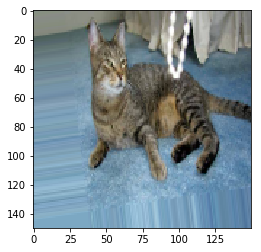

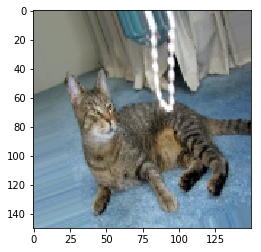

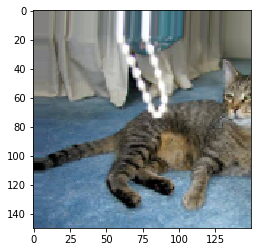

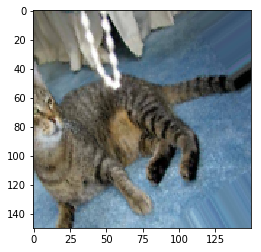

In [49]:
from tensorflow.keras.preprocessing import image

fnames = [os.path.join(train_cats_dir, fname) for 
          fname in os.listdir(train_cats_dir)]

img_path = fnames[3]
img = image.load_img(img_path, target_size=(150, 150))    # Leia a foto

x = image.img_to_array(img)    # shape (150, 150, 3)
x = x.reshape((1,) + x.shape)  # shape (1, 150, 150, 3)

i=0
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break

plt.show()

Observe que o aprimoramento de dados n√£o traz novas informa√ß√µes, apenas remixa as informa√ß√µes originais. Portanto, no caso de poucos dados, o aprimoramento de dados por si s√≥ n√£o √© suficiente para eliminar o sobreajuste, portanto, tamb√©m precisamos usar Dropout antes da camada Densa.

In [51]:
# Defina uma nova rede neural convolucional com dropout

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())

model.add(layers.Dropout(0.5))    # üëà Novo Dropout

model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', 
              optimizer=optimizers.RMSprop(lr=1e-4), 
              metrics=['acc'])

In [52]:
# Use geradores de aumento de dados para treinar redes neurais convolucionais

# Gerador de dados
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

test_datagen = ImageDataGenerator(rescale=1./255)    # O conjunto de teste n√£o √© aprimorado

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary')

# Treinamento
history = model.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=100,
    validation_data=validation_generator,
    validation_steps=50)

# Salvar modelo
model.save('.../dogs-vs-cats/cats_and_dogs_small_2.h5')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/100
100/100 [==============================] - 142s 1s/step - loss: 0.6909 - acc: 0.5265 - val_loss: 0.6799 - val_acc: 0.5127
Epoch 2/100
100/100 [==============================] - 123s 1s/step - loss: 0.6817 - acc: 0.5474 - val_loss: 0.6561 - val_acc: 0.6320
Epoch 3/100
100/100 [==============================] - 127s 1s/step - loss: 0.6652 - acc: 0.5896 - val_loss: 0.7169 - val_acc: 0.5152
Epoch 4/100
100/100 [==============================] - 144s 1s/step - loss: 0.6425 - acc: 0.6244 - val_loss: 0.6010 - val_acc: 0.6815
Epoch 5/100
100/100 [==============================] - 136s 1s/step - loss: 0.6265 - acc: 0.6394 - val_loss: 0.6220 - val_acc: 0.6428
Epoch 6/100
100/100 [==============================] - 155s 2s/step - loss: 0.6165 - acc: 0.6539 - val_loss: 0.5862 - val_acc: 0.6745
Epoch 7/100
100/100 [==============================] - 142s 1s/step - loss: 0.5997 - acc: 0.6761 - val_loss: 0.5

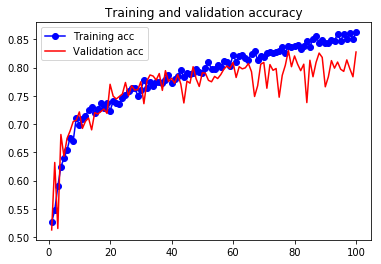

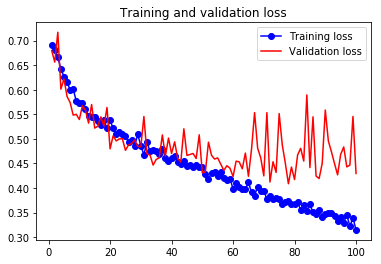

In [54]:
# Trace a curva de perda e a curva de precis√£o durante o treinamento
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo-', label='Training acc')
plt.plot(epochs, val_acc, 'r-', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo-', label='Training loss')
plt.plot(epochs, val_loss, 'r-', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

Depois de usar o Aumento e Elimina√ß√£o de Dados, o sobreajuste √© muito melhor e a precis√£o tamb√©m √© aprimorada.